In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 432x288 with 0 Axes>

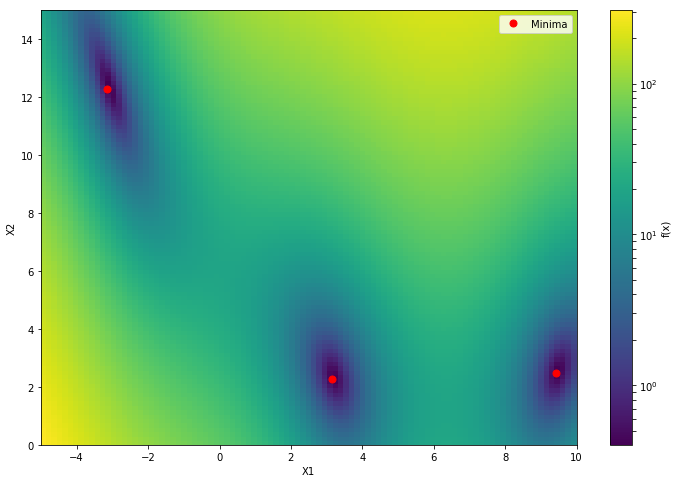

In [2]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [3]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

In [29]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [30]:
opt = Optimizer(dimensions = bounds, base_estimator = 'GP',
               acq_func = 'EI', acq_optimizer = 'sampling', random_state = 1)

In [31]:
opt.tell(X_train.tolist(), Y_train.tolist())

          fun: 1.4812045902545155
    func_vals: array([ 47.05876663, 140.69816492, 149.40557044,  36.49114   ,
        17.84684968,  74.14920215,  87.6691677 ,  19.39331472,
        59.14783199,  54.48915903,  24.61047629,  21.88046699,
        28.95345802,   8.74327102, 143.01149157,  41.03855913,
        38.22548912,  20.98341677,  15.08698239,  63.69440703,
        42.61178376,  23.25824487,  19.87387651,  97.71578397,
        24.99065483,  39.44508928,   6.75074074,  14.99395934,
         2.57740245,  53.21038188,   8.67124056, 132.3741893 ,
        24.89362939,  20.70044653,  21.00658434, 111.20630846,
        20.02820454, 149.01317396,  97.91559467,   3.15338308,
       181.19365664,   7.14328334,   3.98026304,  85.61286014,
         1.48120459,  25.25262995,   8.90448901,  17.35742613,
        32.88939551, 133.23839137])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_lev

In [32]:
a = opt.ask(n_points= 100)
a

[[9.978360844424262, 1.8405153828981844],
 [9.935272523902672, 3.2358790858974187],
 [2.988732053577216, 2.664466504421461],
 [-3.3094706528364233, 12.847240233359658],
 [9.513797717500289, 2.392994275178142],
 [9.79126127046632, 0.02237495624817954],
 [-2.9387745309853033, 11.598451755466657],
 [3.2707124732133703, 1.8961322774459515],
 [9.988566045047303, 0.0641205219084945],
 [9.774723942060355, 0.7916296443171763],
 [-3.2029104748294426, 11.734663366954537],
 [-3.5876826660405623, 14.857366367651142],
 [-3.507776024053956, 13.7887626884384],
 [9.742670250572974, 2.9499721442532016],
 [3.226373058712566, 2.5223395328771963],
 [-3.022858758273556, 11.274991479195855],
 [-3.113669644042491, 11.823908310406312],
 [-2.87972971401244, 11.085680161838146],
 [9.989724668335711, 2.7645440767003584],
 [9.62396554739342, 1.6519290051713673],
 [3.103620995918707, 2.313939063096429],
 [-2.9969931572142774, 11.264830213510436],
 [-3.568847314358762, 14.407323603779792],
 [9.775482518282429, 2.26

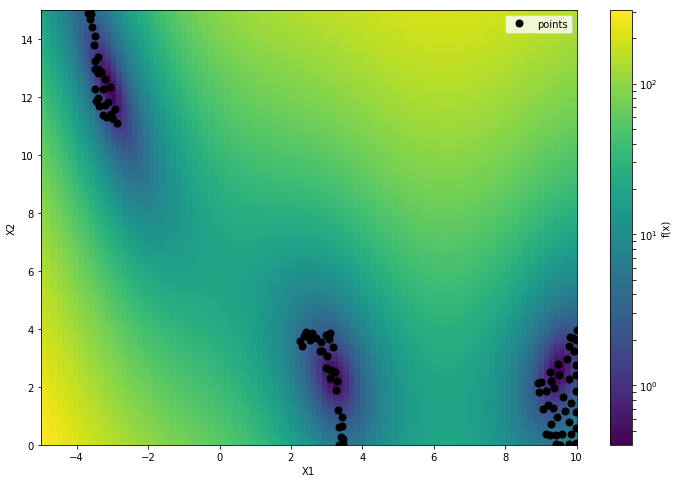

In [33]:
 plot_branin_with_points(np.array(a))

In [34]:
a = opt.models[-1]

In [35]:
opt.ask()

[9.988167193775528, 1.969619966384035]

In [36]:
opt.Xspace.ndim

2

In [26]:
opt.cand_acq_funcs_

['EI']

2